In [1]:
from numpy import exp, abs, angle
import pandas as pd

import coord_helper as ch


# p = "/root/catkin_ws/src/swarm/scripts/coordinates/"
p = "~/ros/catkin_ws/src/swarm/scripts/coordinates/"
# p = "~/catkin_ws/src/swarm/scripts/coordinates/"

In [4]:
dfl = ch.gen_df_list(p)

from path_helper import calc_bezier_path_n_points

def calc_path_from_df_list(df_list):
    l = []
    for d in df_list:
        l.append(d.shape[0])

    length = min(l)

    path_x = pd.DataFrame(range(1, length + 1), columns=["turtle"])
    path_y = pd.DataFrame(range(1, length + 1), columns=["turtle"])
    path_theta = pd.DataFrame(range(1, length + 1), columns=["turtle"])

    for i in range(length):
        for j in range(len(df_list) - 1):
            current = df_list[j].iloc[i]
            target = df_list[j + 1].iloc[i]

            p2 = calc_bezier_path_n_points(
                current.x, current.y, current.d, target.x, target.y, target.d
            )

            for k in range(len(p2)):
                path_x.at[i, str(j) + "_" + str(k)] = p2[k][0]
                path_y.at[i, str(j) + "_" + str(k)] = p2[k][1]
                path_theta.at[i, str(j) + "_" + str(k)] = current.d + (k / len(p2)) * (
                    target.d - current.d
                )

                # path_theta.at[i, str(j) + "_" + str(k)] = current.d + (k / len(p2)) * (
                #     target.d - current.d
                # )

    return path_x, path_y, path_theta

x, y, t = calc_path_from_df_list(dfl)

# write path file

x.to_csv("coordinates/x.csv", index=False)
y.to_csv("coordinates/y.csv", index=False)
t.to_csv("coordinates/t.csv", index=False)

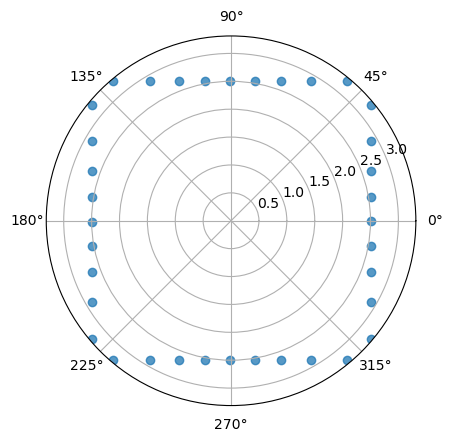

In [6]:
import numpy as np
import matplotlib.pyplot as plt

df = dfl[0]

d = df['d']
a = df['r']

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(d, a, alpha=0.75)

In [7]:
# love = pd.read_csv("coordinates/love.csv")
# love['y'] = 500 - love['y']

# love.to_csv('coordinates/love.csv', index=False)

In [ ]:
import seaborn as sns
c = sns.color_palette("Spectral", 18)
c

[(0.7295655517108804, 0.12587466359092656, 0.2848135332564398),
 (0.8376778162245291, 0.2467512495194156, 0.308881199538639),
 (0.9044213763936948, 0.34794309880815066, 0.28304498269896194),
 (0.9596309111880047, 0.44744329104190683, 0.2719723183391003),
 (0.9790080738177624, 0.5873894655901576, 0.3365628604382929),
 (0.9926951172625913, 0.7092656670511341, 0.40299884659746243),
 (0.9948481353325644, 0.8169165705497885, 0.4934256055363321),
 (0.9968473663975395, 0.9022683583237217, 0.5850826605151864),
 (0.9990003844675125, 0.9690119184928874, 0.697039600153787),
 (0.9750096116878124, 0.9900038446751249, 0.7100346020761246),
 (0.9211841599384853, 0.9684736639753941, 0.6260668973471745),
 (0.8293733179546331, 0.9312572087658594, 0.6108419838523644),
 (0.7023452518262209, 0.8795847750865053, 0.6366782006920415),
 (0.5697808535178779, 0.8272202998846598, 0.6445982314494426),
 (0.42122260668973477, 0.7690888119953864, 0.6467512495194156),
 (0.31203383314109956, 0.6626682045367166, 0.6876585928489043),
 (0.20007689350249905, 0.5377931564782776, 0.7393310265282584),
 (0.2806612841214917, 0.423760092272203, 0.6892733564013841)]

In [ ]:
ca = np.array(c)*255
ca = np.concatenate([ca, np.flip(ca, 0)])

# np.savetxt("color.csv", ca, fmt="%10.4f",  delimiter=",")
np.savetxt("color.csv", ca, fmt="%d",  delimiter=",")
ca

array([[186.03921569,  32.09803922,  72.62745098],
       [213.60784314,  62.92156863,  78.76470588],
       [230.62745098,  88.7254902 ,  72.17647059],
       [244.70588235, 114.09803922,  69.35294118],
       [249.64705882, 149.78431373,  85.82352941],
       [253.1372549 , 180.8627451 , 102.76470588],
       [253.68627451, 208.31372549, 125.82352941],
       [254.19607843, 230.07843137, 149.19607843],
       [254.74509804, 247.09803922, 177.74509804],
       [248.62745098, 252.45098039, 181.05882353],
       [234.90196078, 246.96078431, 159.64705882],
       [211.49019608, 237.47058824, 155.76470588],
       [179.09803922, 224.29411765, 162.35294118],
       [145.29411765, 210.94117647, 164.37254902],
       [107.41176471, 196.11764706, 164.92156863],
       [ 79.56862745, 168.98039216, 175.35294118],
       [ 51.01960784, 137.1372549 , 188.52941176],
       [ 71.56862745, 108.05882353, 175.76470588],
       [ 71.56862745, 108.05882353, 175.76470588],
       [ 51.01960784, 137.13725